In [1]:
import os
import sys
parent = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(parent)

import pandas as pd
import numpy as np
import covidtracking
import matplotlib.pyplot as plt

start = pd.to_datetime('2020-03-04')
US = covidtracking.load_us()

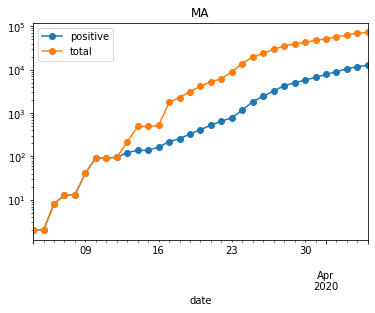

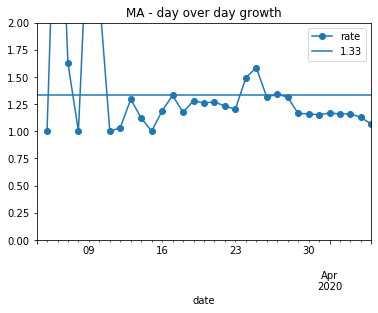

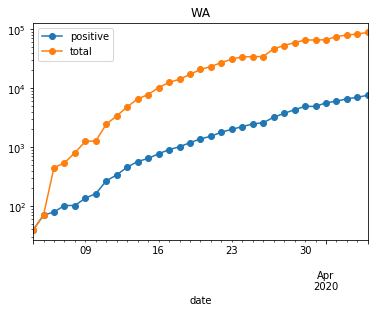

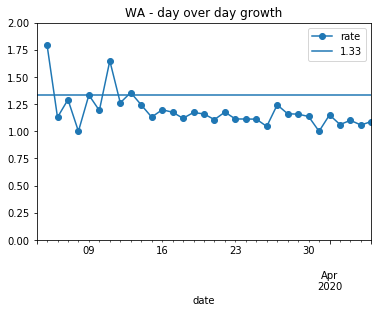

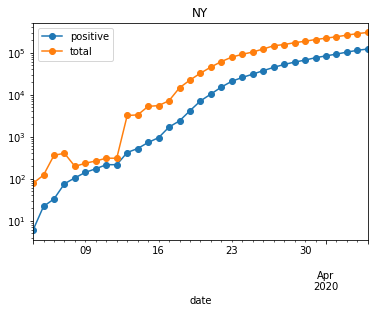

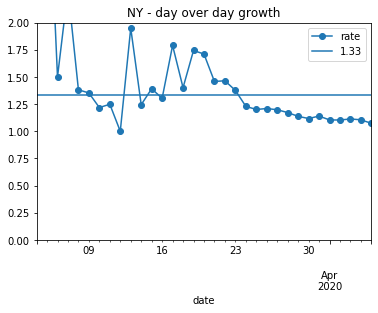

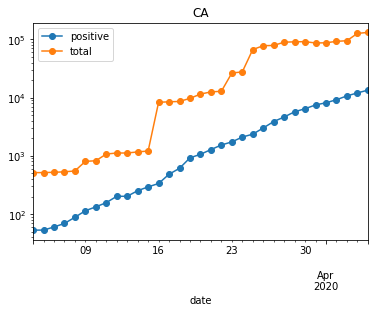

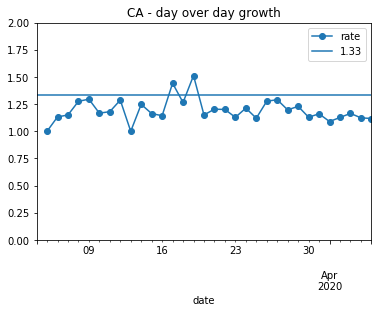

In [2]:
for state in ['MA', 'WA', 'NY', 'CA']:
    cols = ['positive', 'total']
    US[state][start:].plot(y=cols, style='-o')
    plt.yscale('log')
    plt.title(state)
    plt.show()

    cols = ['positive']
    rate = US[state].loc[start:, cols].apply(np.log).diff().apply(np.exp)
    ax = rate.plot(style='-o')
    plt.title(f'{state} - day over day growth')
    plt.ylim([0, 2])
    l2 = plt.axhline(1.33)
    plt.legend([ax.lines[0]] + [l2], ['rate', '1.33'])
    plt.show()

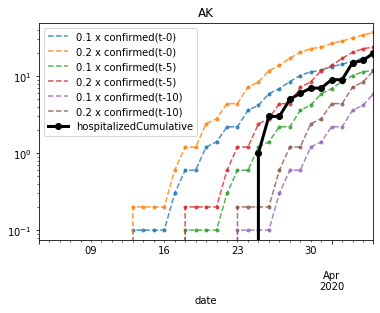

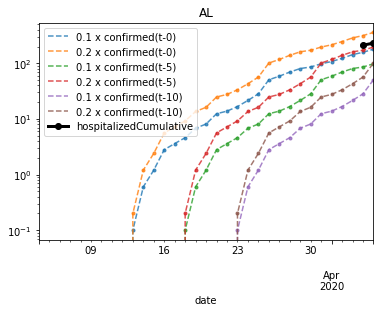

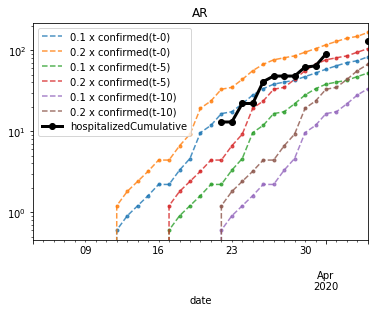

/Users/sheldon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


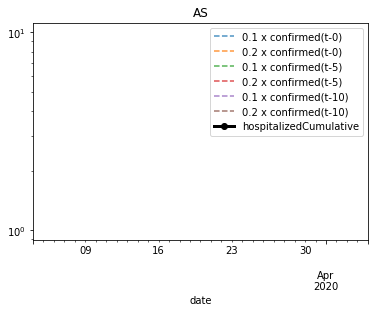

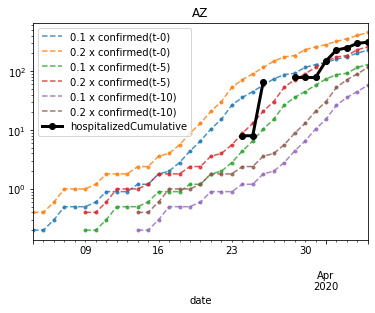

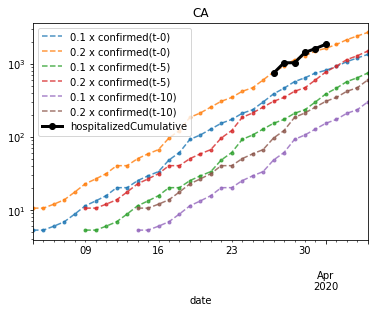

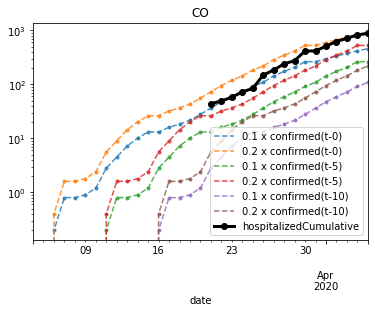

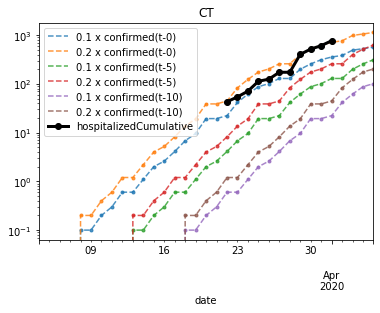

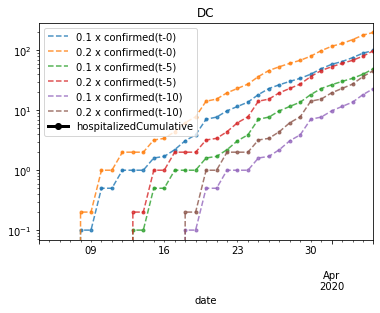

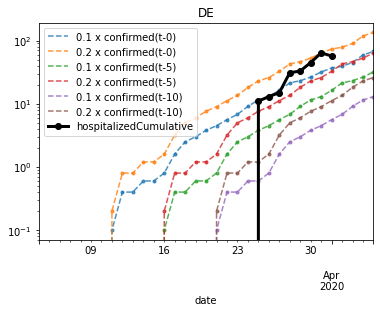

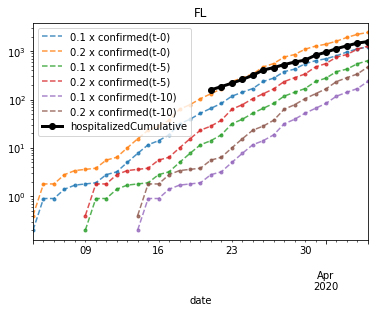

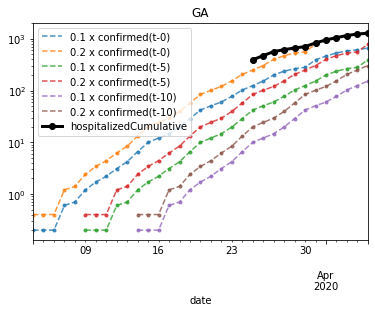

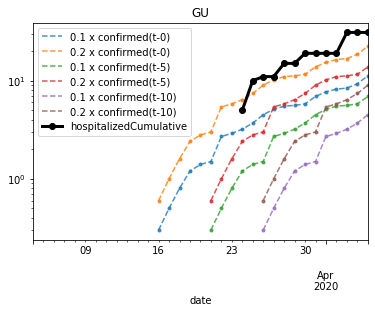

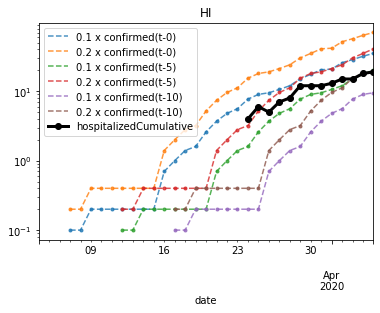

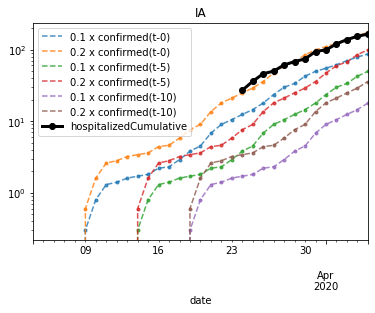

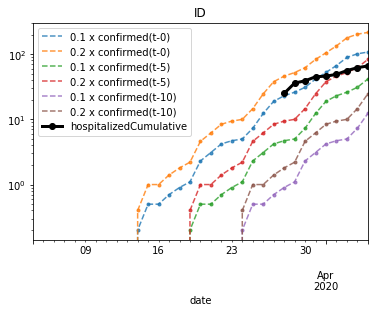

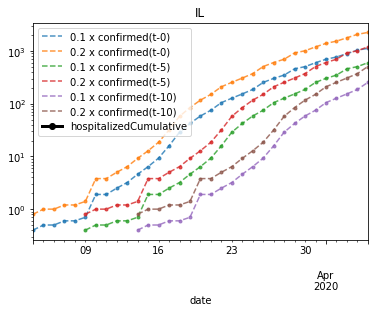

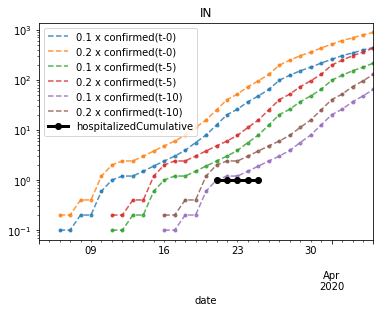

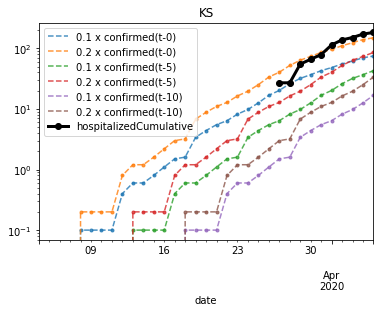

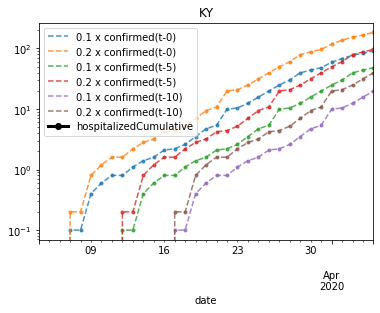

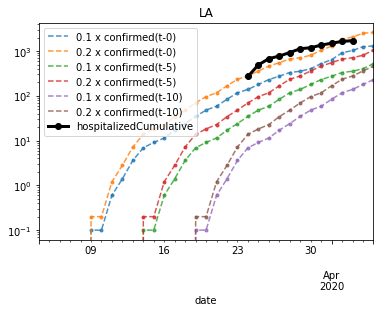

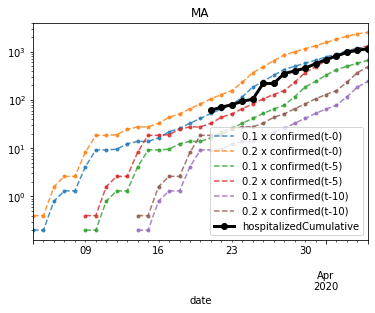

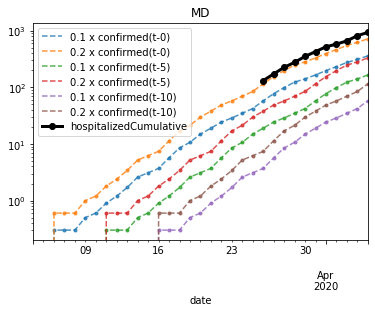

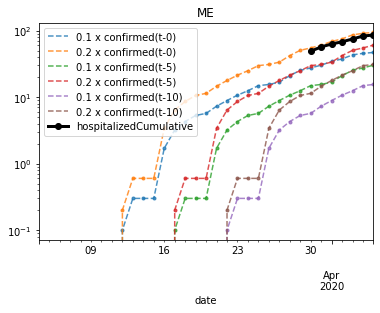

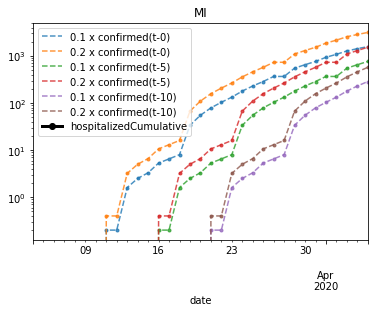

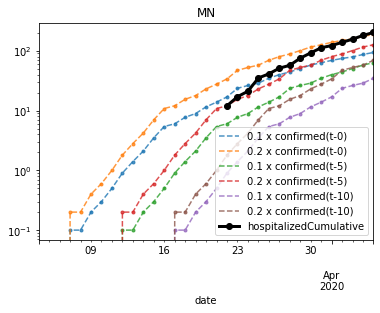

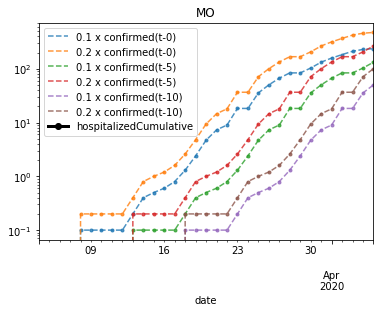

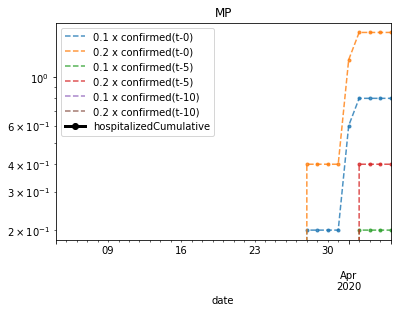

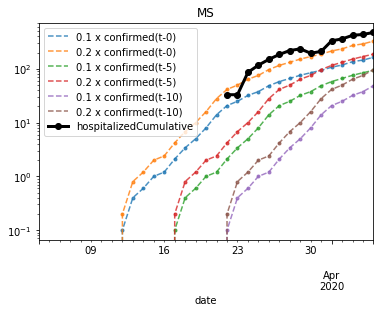

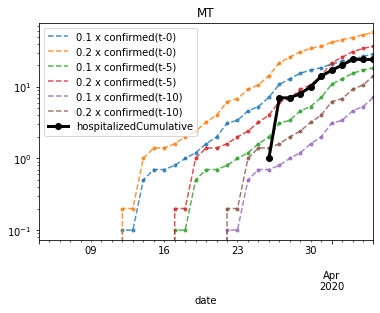

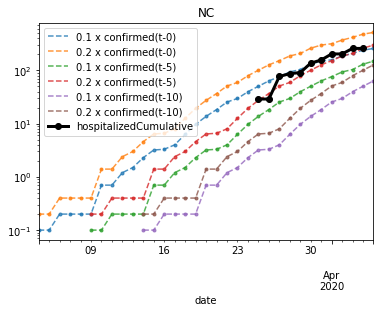

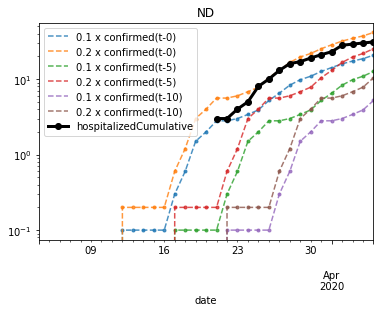

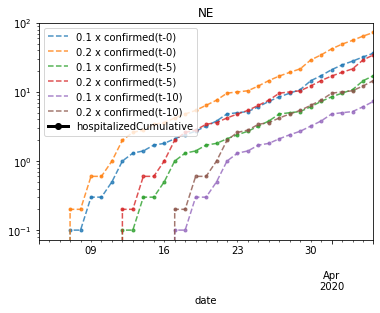

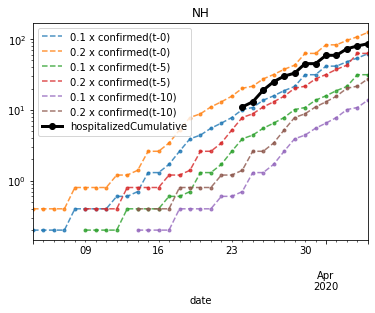

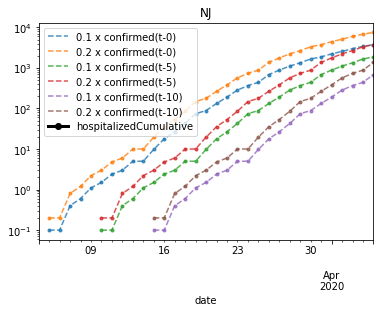

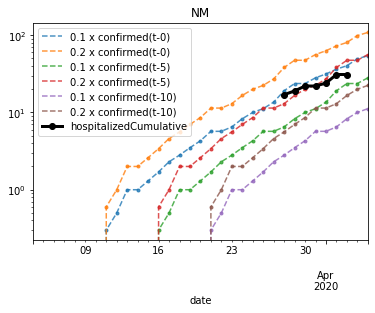

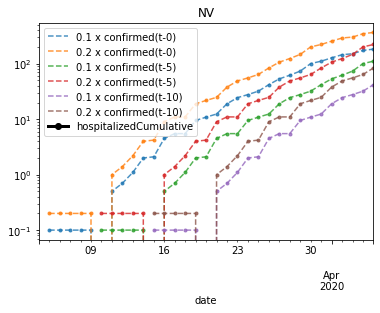

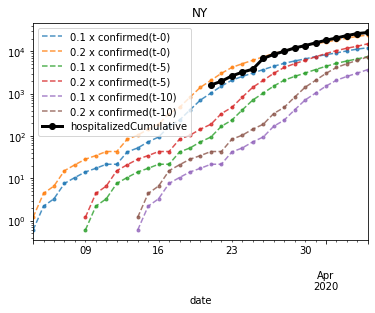

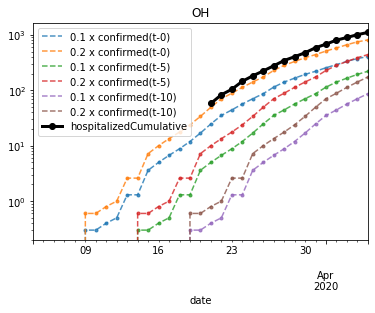

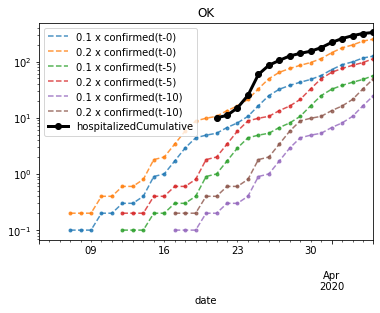

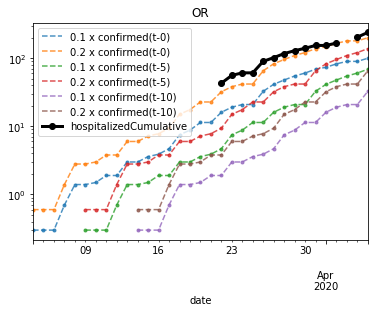

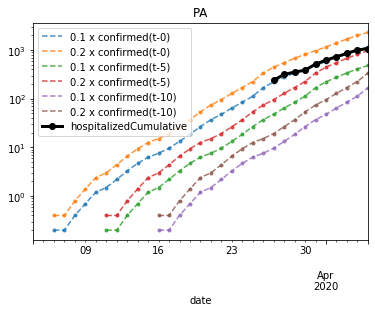

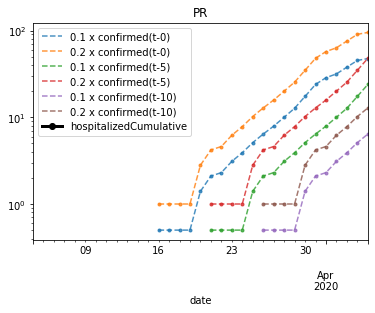

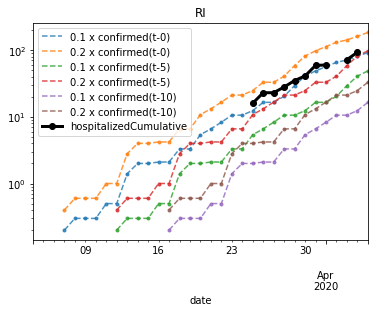

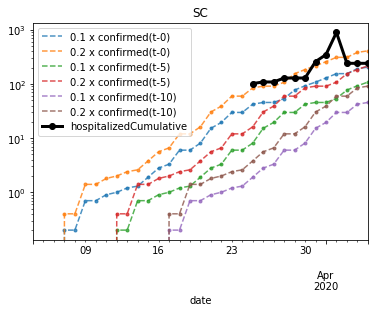

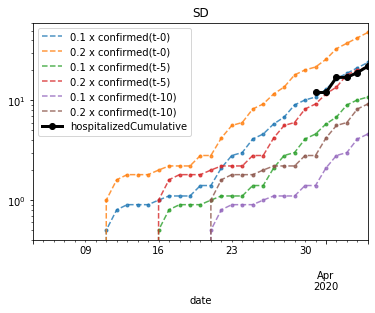

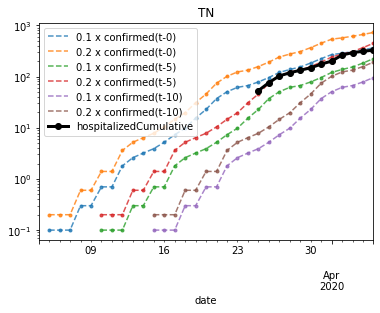

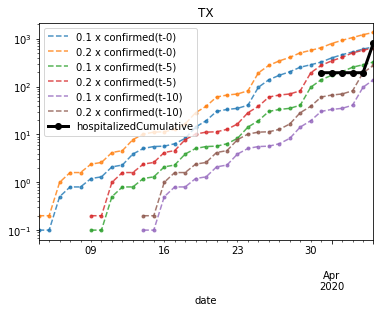

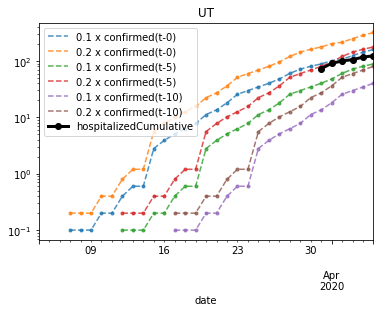

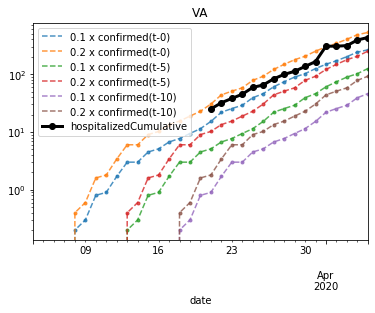

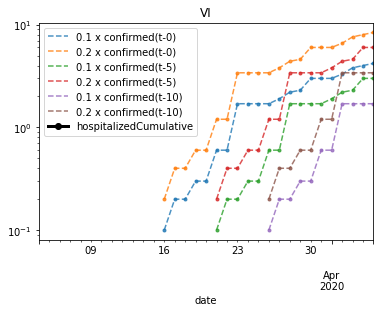

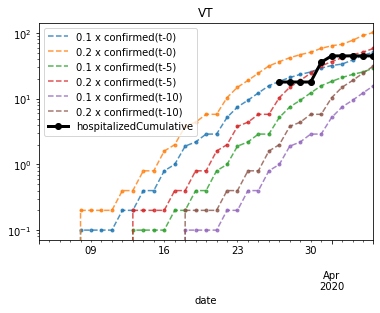

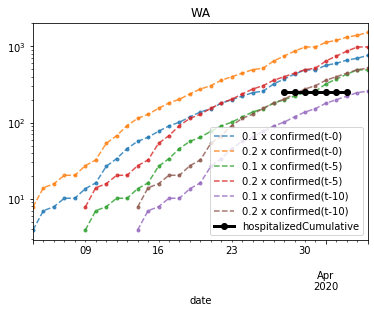

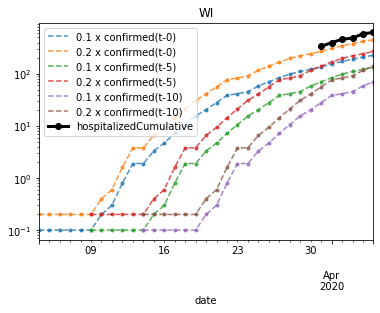

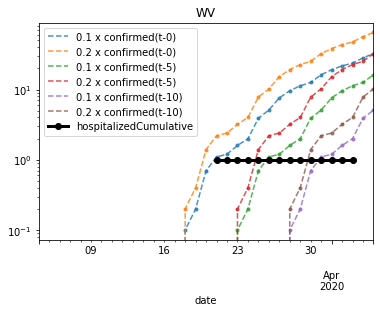

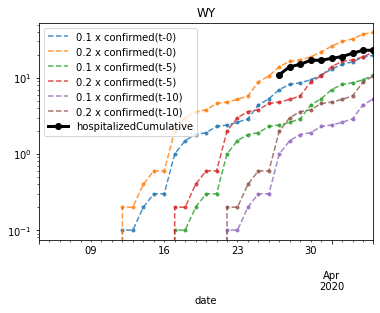

In [103]:
cols = ['confirmed', 'death', 'hospitalizedCumulative']

states = US.columns.unique(level=0)
#states = ['WA']

target = 'hospitalizedCumulative'

shifts = [0, 5, 10]
scales = [0.1, 0.2]

for state in states:
    data = {col: US[state][col] for col in cols}
    df = pd.DataFrame(data = data)
    predictors = []
    for shift in shifts:
        for scale in scales:
            name = f'{scale} x confirmed(t-{shift})'
            df[name] = scale*df.confirmed.shift(shift)
            predictors.append(name)
    
    fig, ax = plt.subplots()
    df.plot(style='--.', y = predictors, ax=ax, alpha=0.8)
    df.plot(style='-o', y = target, ax=ax, color='k', linewidth=3)
    plt.title(state)
    plt.yscale('log')

    filename = f'vis2/{target}_{state}.png'
    plt.savefig(filename)
    
    plt.show()


In [21]:
display(US.MA)
777/646

,confirmed,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,pending,positive,positiveIncrease,total,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-03-04,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,NaN
2020-03-05,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,0.0,2.0,2.0,0.0
2020-03-06,8.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,8.0,6.0,8.0,8.0,6.0
2020-03-07,13.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,13.0,5.0,13.0,13.0,5.0
2020-03-08,13.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,13.0,0.0,13.0,13.0,0.0
2020-03-09,41.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,41.0,28.0,41.0,41.0,28.0
2020-03-10,92.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,92.0,51.0,92.0,92.0,51.0
2020-03-11,92.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,92.0,0.0,92.0,92.0,0.0
2020-03-12,95.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,95.0,3.0,95.0,95.0,3.0


1.2027863777089782